## Q9 
### Display mismatched samples of model and annotators



In [50]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
annotators_labels = pd.read_csv('./human_eval.csv') #load annotators data
annotators_labels.head() #display head of annotators data

,COMMENT_ID,COMMENT_PARENT_ID,COMMENT_SCORE,COMMENT_DEPTH,COMMENT_CREATED_TIMESTAMP,AUTHOR_USERNAME,COMMENT_TEXT_CONTENT,22210036,22210034,22210019,ANNOTATORS_MAJORITY
0,gh9s8ju,t3_juj2j1,2,0,1609142409,wrench_552,Let's gooooo. I have no words thats really cool,Positive,Neutral,Neutral,Neutral
1,iiw07ey,t3_wflhmh,8,0,1659598584,auspexone,"This is epic, OP you are so damn gifted! Would...",Positive,Positive,Positive,Positive
2,ij10h7d,t3_wflhmh,1,0,1659686501,SinkingRubberDucky,Love this!,Positive,Positive,Positive,Positive
3,goon47e,t3_ls19tn,4,0,1614240134,grandwhitelotus,Omg this was so good. Do they even make this a...,Positive,Positive,Positive,Positive
4,j5a7mkx,t1_j59ojxs,2,6,1674313043,Vast-Cockroach464,"Iâ€™m sure all trees would love to hug you , g...",Positive,Positive,Negative,Positive


In [18]:
models_label = pd.read_csv('./model_labels.csv') #load model predicted data
models_label.head() #head of models_label data

,COMMENT_ID,COMMENT_PARENT_ID,COMMENT_SCORE,COMMENT_DEPTH,COMMENT_CREATED_TIMESTAMP,AUTHOR_USERNAME,COMMENT_TEXT_CONTENT,MODEL_LABEL_CARDIFFNLP,MODEL_LABEL_FINITEAUTOMATA,MODEL_LABEL_SEETHAL,MODEL_MAJORITY
0,gh9s8ju,t3_juj2j1,2,0,1.609142e+09,wrench_552,Let's gooooo. I have no words thats really cool,positive,positive,neutral,positive
1,iiw07ey,t3_wflhmh,8,0,1.659599e+09,auspexone,"This is epic, OP you are so damn gifted! Would...",positive,positive,neutral,positive
2,ij10h7d,t3_wflhmh,1,0,1.659687e+09,SinkingRubberDucky,Love this!,positive,positive,neutral,positive
3,goon47e,t3_ls19tn,4,0,1.614240e+09,grandwhitelotus,Omg this was so good. Do they even make this a...,positive,positive,neutral,positive
4,j5a7mkx,t1_j59ojxs,2,6,1.674313e+09,Vast-Cockroach464,"I’m sure all trees would love to hug you , go ...",positive,positive,neutral,positive


In [22]:
#columns needed to include in the final merge for comparision of model_labels and annotator labels.
columns_to_inc_annot = ['COMMENT_ID', 'COMMENT_TEXT_CONTENT', 'ANNOTATORS_MAJORITY']
columns_to_inc_model = ['COMMENT_ID', 'MODEL_MAJORITY']

In [31]:
#merge the model_labels and annotator_labels on comment_id
merge_model_annotators = pd.merge(annotators_labels[columns_to_inc_annot], 
                                  models_label[columns_to_inc_model], 
                                  on = 'COMMENT_ID', how = 'inner')
merge_model_annotators.head()

,COMMENT_ID,COMMENT_TEXT_CONTENT,ANNOTATORS_MAJORITY,MODEL_MAJORITY
0,gh9s8ju,Let's gooooo. I have no words thats really cool,Neutral,positive
1,iiw07ey,"This is epic, OP you are so damn gifted! Would...",Positive,positive
2,ij10h7d,Love this!,Positive,positive
3,goon47e,Omg this was so good. Do they even make this a...,Positive,positive
4,j5a7mkx,"Iâ€™m sure all trees would love to hug you , g...",Positive,positive


In [32]:
#making labels case-insensitive for proper comparision
merge_model_annotators['ANNOTATORS_MAJORITY'] = merge_model_annotators['ANNOTATORS_MAJORITY'].str.lower()
merge_model_annotators['MODEL_MAJORITY'] = merge_model_annotators['MODEL_MAJORITY'].str.lower()

In [33]:
#filtering out those sampls where annotators_labels and model_lables don't match (mismatched_samples).
mismatched_samples = merge_model_annotators[
        merge_model_annotators['ANNOTATORS_MAJORITY'] != merge_model_annotators['MODEL_MAJORITY']]
mismatched_samples.head()

,COMMENT_ID,COMMENT_TEXT_CONTENT,ANNOTATORS_MAJORITY,MODEL_MAJORITY
0,gh9s8ju,Let's gooooo. I have no words thats really cool,neutral,positive
6,i9pavpa,I'm sharing because I thought it was freaking ...,neutral,positive
8,jc2u1lf,I love 9 eleven! Itâ€™s da bomb!,negative,positive
12,infteaz,He made a pretty good joke dude. He's not even...,neutral,positive
15,gcgcdib,"Hey OP, I'm a really shitty small music ""produ...",neutral,positive


In [39]:
mismatched_samples.shape #shape of msimatched samples.

(42, 4)

The above shape indicates that the number of samples where the predcition of models and annotations dont match are 42. So, 58 samples match.

In [41]:
# select random five samples from mismatched_samples

sample_five = mismatched_samples.sample(5)
sample_five.head()

,COMMENT_ID,COMMENT_TEXT_CONTENT,ANNOTATORS_MAJORITY,MODEL_MAJORITY
80,j72bjki,I'd absolutely watch that!,positive,neutral
30,i4kvl63,"Me, my husband and two boys are in SR right no...",neutral,positive
72,izsmqxw,Easiest geography map ever,positive,neutral
32,hajv6pv,Yeah those walksss! its a nice moment to keep ...,neutral,positive
0,gh9s8ju,Let's gooooo. I have no words thats really cool,neutral,positive


In [49]:
#print 5 random mismatched samples
for i in range(5):
    print(f'Comment {i+1}: ',sample_five.iloc[i,1])
    print('Model Majority: ', sample_five.iloc[i,3])
    print('Annotators Majority: ', sample_five.iloc[i,2])
    print('\n')

Comment 1:  I'd absolutely watch that!
Model Majority:  neutral
Annotators Majority:  positive


Comment 2:  Me, my husband and two boys are in SR right now (British). Been here a week, have another week and half to go. We're having a great time. The power cuts are a minor inconvenience, we're out exploring all day anyway. We are not impacted by the economic situation, transport and food very available, just expensive for locals. It's a very interesting time to be here, have seen some protests and had lots of interesting political discussions with people. Have found everyone very welcoming and warm. The exchange rate is favourable for tourists, though terrible for locals. It feels good to be contributing to local economies in a very small way I'd thoroughly recommend visiting SL right now ðŸ˜Š
Model Majority:  positive
Annotators Majority:  neutral


Comment 3:  Easiest geography map ever
Model Majority:  neutral
Annotators Majority:  positive


Comment 4:  Yeah those walksss! its a ni

### Comparision of annotators vs model prediction (PIE CHART)

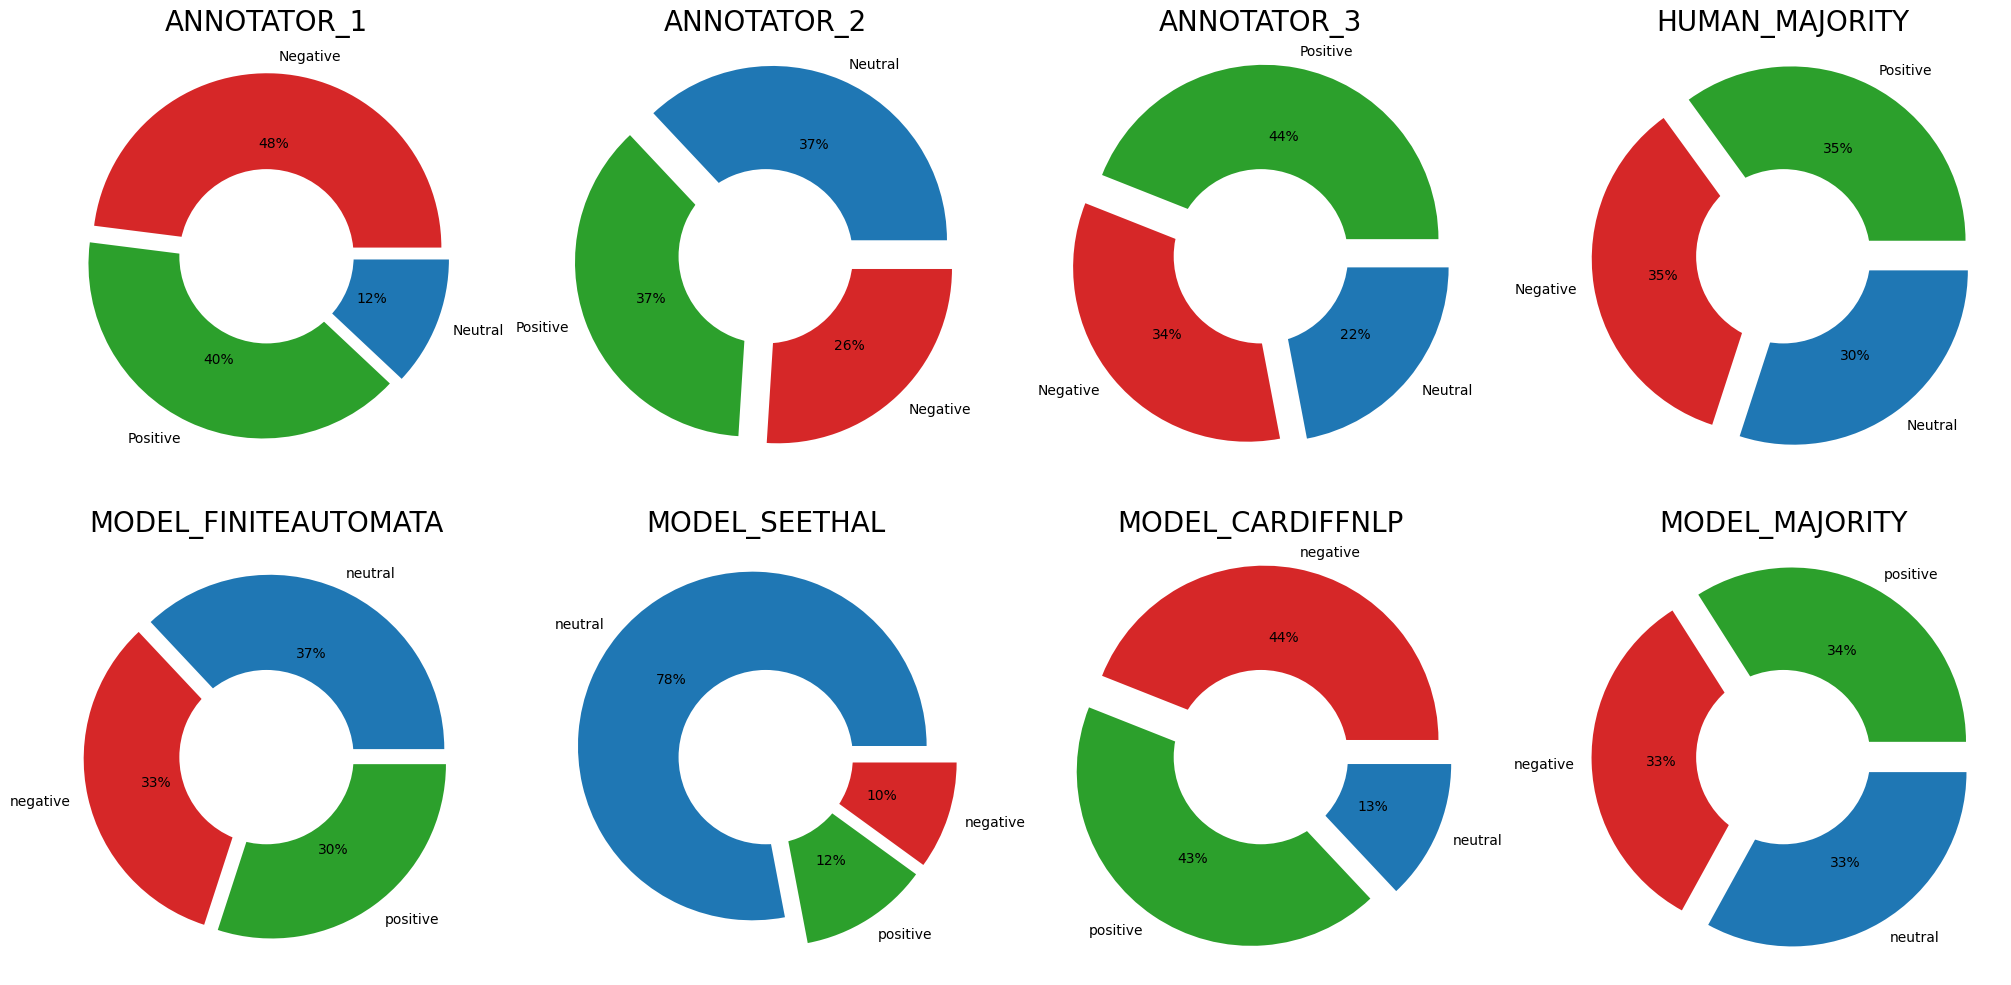

In [65]:
plt.figure(figsize=(20, 10),dpi=100 , layout = 'constrained')

#creating pie chart for label composition for 100 samples for each annotator.

#annotator1
plt.subplot(2, 4, 1)
annotators_labels['22210036'].value_counts().plot(kind='pie',autopct='%1.0f%%', colors=['C3', 'C2', 'C0'],explode=(0.05,0.05,0.05))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('ANNOTATOR_1', fontsize=20)

#annotator2
plt.subplot(2, 4, 2)
annotators_labels['22210034'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C0', 'C2', 'C3'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('ANNOTATOR_2', fontsize=20)

#annotator3
plt.subplot(2, 4, 3)
annotators_labels['22210019'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C2', 'C3', 'C0'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('ANNOTATOR_3', fontsize=20)

#Majority vote of the annotators

plt.subplot(2, 4, 4)
annotators_labels['ANNOTATORS_MAJORITY'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C2', 'C3', 'C0'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('HUMAN_MAJORITY', fontsize=20)

#creating pie chart for label composition for 100 samples for each model.

plt.subplot(2, 4, 5)
models_label['MODEL_LABEL_FINITEAUTOMATA'].value_counts().plot(kind='pie',autopct='%1.0f%%', colors=['C0', 'C3', 'C2'],explode=(0.05,0.05,0.05))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('MODEL_FINITEAUTOMATA', fontsize=20)


#model_1
plt.subplot(2, 4, 6)
models_label['MODEL_LABEL_SEETHAL'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C0', 'C2', 'C3'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('MODEL_SEETHAL', fontsize=20)

#model_2
plt.subplot(2, 4, 7)
models_label['MODEL_LABEL_CARDIFFNLP'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C3', 'C2', 'C0'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('MODEL_CARDIFFNLP', fontsize=20)

#model_2
plt.subplot(2, 4, 8)
models_label['MODEL_MAJORITY'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['C2', 'C3', 'C0'],explode=(0.1,0.1,0.1))
plt.pie([1], radius=0.5, colors='w')
plt.ylabel("")
plt.title('MODEL_MAJORITY', fontsize=20)

plt.show()





Text(0.5, 1.0, 'Agreements between Humans and Models')

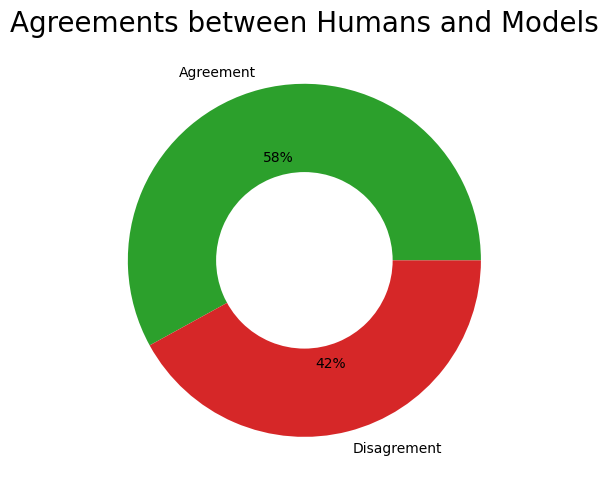

In [66]:
plt.figure(dpi=100 , layout = 'constrained')

#pie chart ofr agreement vs agreement between Model and Human
mylabels = ["Agreement", "Disagrement"]

# creating column to look at match and mismatch
comparision_col = merge_model_annotators['ANNOTATORS_MAJORITY']==merge_model_annotators['MODEL_MAJORITY']

comparision_col.value_counts().plot(
    kind='pie',autopct='%1.0f%%', colors=['C2', 'C3'],labels = mylabels)


plt.pie([1], radius=0.5, colors='w')
# plt.pie()

plt.ylabel("")
plt.title('Agreements between Humans and Models', fontsize=20)